# ADA Project - DataBrewers

The aim of this project is to analyze beer preference shifts across seasons and in response to weather changes, events and cultural festivities. This could significantly help professionals (brewers, marketers, etc.) by providing insights into customer preferences. 
By understanding seasonal trends, brewers can adjust their product offerings to align more closely with consumer demand. 
Moreover, as a conclusion of our research, we could suggest the best beer that would be the perfect match for each season/festivity, in the form of a time fresco. 


## Data selection and filtering
Our analysis will primarly focus on the reviews published by users based in the United State of America. The reason for this choice is that it is the country were the majority of reviews are done, and it provides us with enough data to conduct our analysis.

1. **The Herding Effect:** As explained in the paper "When Sheep Shop: Measuring Herding Effects in Product Ratings with Natural Experiments" from Gael Lederrey and Robert West, initial ratings can influence the following ones. By focusing on a single dataset, we can better control for this effect within a single user community. Including RateBeer might introduce inconsistent herding effects that could skew comparative analyses.
2. **Inconsistant Rating Standards:** Both BeerAdvocate and RateBeer communities likely develop their own informal standards for beer ratings. Focusing on a single platform like BeerAdvocate allows dor a more cohesive dataset, with users who rate within the same context, minimizing cross-platform variance.
3. **Data Sufficiency:** The BeerAdvocate dataset provides us with enough reviews and data to perform meaningful analysis and draw reliable insights.

In [7]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading

Matched beer dataset loading:

In [8]:
file_path = 'data/matched_beer_data.tar'
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   26775015 2017-08-10 17:15:37 ratings.csv 
?rw-rw-r-- gayouf/gayouf   99396732 2018-03-19 14:13:29 ratings_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133634318 2018-03-19 14:22:54 ratings_rb.txt.gz 
?rwxrwxrwx gayouf/gayouf     533538 2017-08-08 15:35:54 users_approx.csv 
?rwxrwxrwx gayouf/gayouf     429785 2017-08-07 14:51:08 users.csv 
?rwxrwxrwx gayouf/gayouf   14246582 2018-03-19 14:26:49 beers.csv 
?rwxrwxrwx gayouf/gayouf    1045044 2017-08-02 18:10:05 breweries.csv 
?rw-rw-r-- gayouf/gayouf   77201217 2018-03-20 21:16:35 ratings_with_text_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133632940 2018-03-20 21:25:56 ratings_with_text_rb.txt.gz 


In [9]:
ratings_merged = pd.read_csv('../data/ratings.csv', low_memory=False)
users_approx = pd.read_csv('../data/users_approx.csv')
users_merged = pd.read_csv('../data/users.csv')
beers_merged = pd.read_csv('../data/beers.csv', low_memory=False)
breweries_merged = pd.read_csv('../data/breweries.csv')

BeerAdvocated loading:

In [10]:
file_path = 'data/BeerAdvocate.tar'
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


In [11]:
beers_ba = pd.read_csv('../data/beers.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
users_ba = pd.read_csv('../data/users.csv')
breweries_ba = pd.read_csv('../data/breweries.csv')
ratings_ba = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

RateBeer loading:

In [13]:
file_path = 'data/RateBeer.tar'
with tarfile.open(file_path, 'r') as tar:
    tar.extractall(path='../data')
    tar.list()

?rwxrwxrwx gayouf/gayouf   47204946 2017-10-27 18:02:52 beers.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    3202831 2017-08-07 13:16:07 users.csv 
?rwxrwxrwx gayouf/gayouf    1038205 2017-08-03 19:54:31 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926392900 2017-08-03 19:55:50 ratings.txt.gz 


In [14]:
beers_rb = pd.read_csv('../data/beers.csv')
reviews_rb = pd.read_csv('../data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
users_rb = pd.read_csv('../data/users.csv')
breweries_rb = pd.read_csv('../data/breweries.csv')
ratings_rb = pd.read_csv('../data/ratings.txt.gz', delimiter='\t', on_bad_lines='skip')

### Difference between the RateBeer and BeerAdvocate dataset

Number of users

In [16]:
nb_users_rb = len(users_rb)
nb_users_ba = len(users_ba)

print("The RateBeer dataset have", nb_users_rb, "users.")
print("The BeerAdvocate dataset have", nb_users_ba, "users.")

The RateBeer dataset have 70174 users.
The BeerAdvocate dataset have 153704 users.


Number of beers

In [17]:
# We prompt the number of beers in the dataset
nb_beers_rb = len(beers_rb)
nb_beers_ba = len(beers_ba)

print("The RateBeer dataset have", nb_beers_rb, "beers.")
print("The BeerAdvocate dataset have", nb_beers_ba, "beers.")

The RateBeer dataset have 442081 beers.
The BeerAdvocate dataset have 280823 beers.


Number of ratings

In [18]:
# We prompt the numbers of ratings in the dataset using the nbr_ratings column of the beers dataset and summing them
nb_ratings_rb = beers_rb['nbr_ratings'].sum()
nb_ratings_ba = beers_ba['nbr_ratings'].sum()

print("The RateBeer dataset have", nb_ratings_rb, "ratings.")
print("The BeerAdvocate dataset have", nb_ratings_ba, "ratings.")

The RateBeer dataset have 7122074 ratings.
The BeerAdvocate dataset have 8393032 ratings.


Numbers of reviews

In [19]:
# Add review_id based on 16-row structure 
reviews_ba['review_id'] = reviews_ba.index // 16

# Split key-value pairs and filter valid splits
split_data_ba = reviews_ba['info'].str.split(': ', n=1, expand=True)
split_data_ba = split_data_ba[split_data_ba[1].notna()]  # Remove rows with no :

# Assign key and value columns
reviews_ba[['key', 'value']] = split_data_ba

# Pivot the table to convert key to a column
reviews_ba = reviews_ba.pivot(index='review_id', columns='key', values='value').reset_index(drop=True)

In [20]:
del split_data_ba

In [21]:
# Load the reviews dataset in batches

processed_chunks = []
chunk_size = 1600  

for chunk in pd.read_csv('../data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', 
                         on_bad_lines='skip', chunksize=chunk_size):
    
    # Add review_id based on 16-row structure 
    chunk['review_id'] = chunk.index // 16
    
    # Split key-value pairs and remove rows without a valid split
    split_data = chunk['info'].str.split(': ', n=1, expand=True)
    split_data = split_data[split_data[1].notna()]
    
    # Assign key and value columns
    chunk[['key', 'value']] = split_data
    
    # Pivot the chunk to convert key to columns
    chunk_pivoted = chunk.pivot(index='review_id', columns='key', values='value').reset_index(drop=True)
    processed_chunks.append(chunk_pivoted)

# Concatenate all processed chunks
reviews_rb = pd.concat(processed_chunks, ignore_index=True)

In [22]:
# We prompt the numbers of ratings in the dataset using the nbr_ratings column of the beers dataset and summing them
nb_reviews_rb = len(reviews_rb)
nb_reviews_ba = len(reviews_ba)

print("The RateBeer dataset have", nb_reviews_rb, "reviews.")
print("The BeerAdvocate dataset have", nb_reviews_ba, "reviews.")

The RateBeer dataset have 7122074 reviews.
The BeerAdvocate dataset have 2589586 reviews.


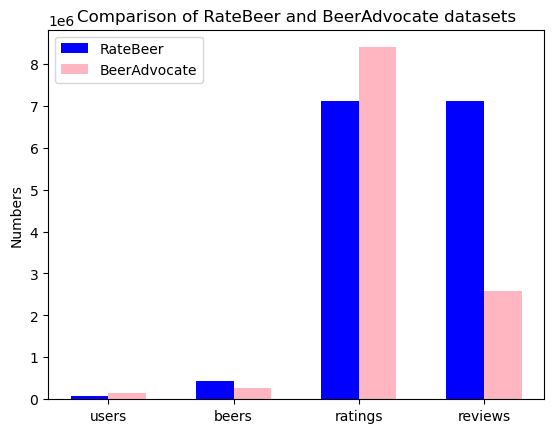

In [23]:
labels = ["users", "beers", "ratings", "reviews"]

rb_counts = [nb_users_rb, nb_beers_rb, nb_ratings_rb, nb_reviews_rb]
ba_counts = [nb_users_ba, nb_beers_ba, nb_ratings_ba, nb_reviews_ba]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bars_rb = ax.bar(x - width/2, rb_counts, width, label='RateBeer', color='blue')
bars_ba = ax.bar(x + width/2, ba_counts, width, label='BeerAdvocate', color='lightpink')

ax.set_ylabel('Numbers')
ax.set_title('Comparison of RateBeer and BeerAdvocate datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [24]:
summary_data = {
    "Metric": ["users", "beers", "ratings", "reviews"],
    "RateBeer": [nb_users_rb, nb_beers_rb, nb_ratings_rb, nb_reviews_rb],
    "BeerAdvocate": [nb_users_ba, nb_beers_ba, nb_ratings_ba, nb_reviews_ba]
}
summary_df = pd.DataFrame(summary_data)
summary_df.style.set_caption("Summary for RateBeer and BeerAdvocate")

,Metric,RateBeer,BeerAdvocate
0,users,70174,153704
1,beers,442081,280823
2,ratings,7122074,8393032
3,reviews,7122074,2589586


The BeerAdvocate dataset provides us with enough reviews and data to perform and we will focus only on this dataset for the rest of the analysis.

### Users location analysis

In [25]:
# Separate the country and the states
users_ba['country'] = users_ba['location'].str.split(',').str[0]
users_ba['states'] = users_ba['location'].str.split(',').str[1]

In [26]:
missing_countries = users_ba['country'].isna().sum()
print(f"Number of missing 'country' entries: {missing_countries}")

Number of missing 'country' entries: 31279


In [27]:
# Replace missing 'country' values with a label "Unknown"
users_ba['country'] = users_ba['country'].fillna('Unknown')

# Compute the number of users in the top 5 countries
top5_countries = users_ba['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries (including 'Unknown' entries if any)
other_countries_count = len(users_ba) - top5_countries.sum()

# Add the "Other" countries count to the series
top_countries = pd.concat([top5_countries, pd.Series({'Other': other_countries_count})])

# Calculate percentages for each country in top_countries
top_countries_percent_ba = (top_countries / len(users_ba) * 100).round(1)

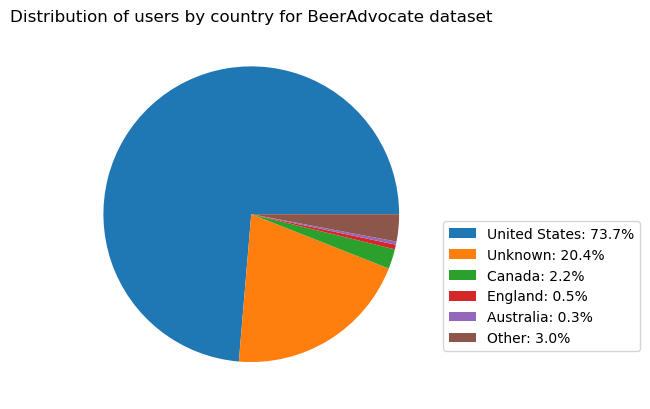

In [28]:
top_countries.plot(kind='pie', labels=None)

# Create legend with country name and percentage
top_countries_labels = [f"{country}: {percent}%" for country, percent in zip(top_countries.index, top_countries_percent_ba)]
plt.legend(labels=top_countries_labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.title(f'Distribution of users by country for BeerAdvocate dataset')
plt.show()

The majority of the users are from the United States. 

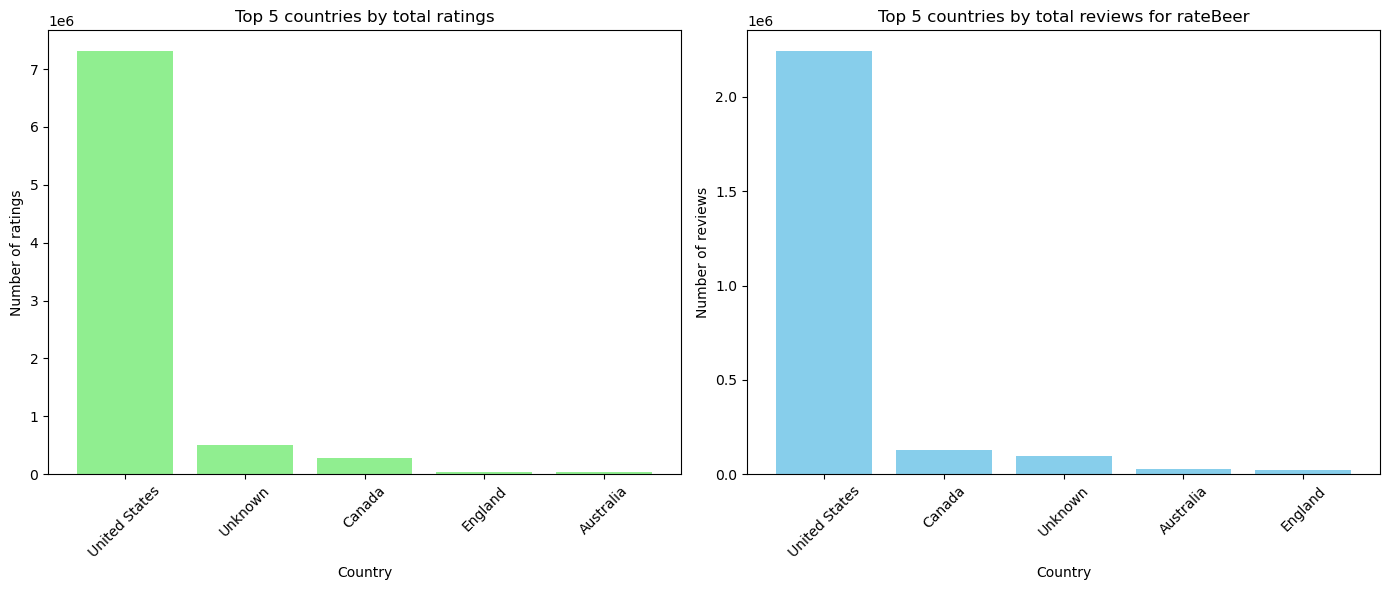

In [29]:
# Convert the number of ratings values to numeric
users_ba['nbr_ratings'] = pd.to_numeric(users_ba['nbr_ratings'], errors='coerce')
users_ba['nbr_reviews'] = pd.to_numeric(users_ba['nbr_reviews'], errors='coerce')

# Group by country and sum the ratings and the reviews
country_ratings = users_ba.groupby('country')['nbr_ratings'].sum().reset_index()
country_reviews = users_ba.groupby('country')['nbr_reviews'].sum().reset_index()

# Get the top 5 countries by number of ratings and reviews
top_countries_ratings = country_ratings.nlargest(5, 'nbr_ratings')
top_countries_reviews = country_reviews.nlargest(5, 'nbr_reviews')


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(top_countries_ratings['country'], top_countries_ratings['nbr_ratings'], color='lightgreen')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of ratings')
axes[0].set_title('Top 5 countries by total ratings')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(top_countries_reviews['country'], top_countries_reviews['nbr_reviews'], color='skyblue')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of reviews')
axes[1].set_title('Top 5 countries by total reviews for rateBeer')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

And most of the ratings and reviews are made by american users. Therefore, we chosed to focus only on American users as this still provide us enough data

In [30]:
# We only keep users from the US
users = users_ba[users_ba['country'] == 'United States']
print("There are", len(users), "users from the United States in the BeerAdvocate dataset")

# We prompt the number of ratings made by US users using the nb_ratings column of the users dataset and summing them for users where location is contains United States 
print("Number of ratings made by US users: ", users[users['country'].str.contains('United States')]['nbr_ratings'].sum())

# We prompt the number of reviews made by US users using the nb_reviews column of the users dataset and summing them for users where location is contains United States
print("Number of reviews made by US users: ", users[users['country'].str.contains('United States')]['nbr_reviews'].sum())

There are 113223 users from the United States in the BeerAdvocate dataset
Number of ratings made by US users:  7303870
Number of reviews made by US users:  2241334


In [31]:
reviews_ba = reviews_ba.merge(users_ba[['user_id', 'location']], on='user_id', how='left')

In [32]:
# Remove the states to only have the countries
reviews_ba['country'] = reviews_ba['location'].str.split(',').str[0]

# Remove the countries to only have the states
reviews_ba['states'] = reviews_ba['location'].str.split(',').str[1]

# We only keep users from the US
reviews = reviews_ba[reviews_ba['country'] == 'United States']

### Time analysis


In [33]:
# Extract the year, month, and day
reviews['date']  = pd.to_datetime(reviews['date'], unit='s', errors='coerce')
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews['day'] = reviews['date'].dt.day

/var/folders/47/c40ytxbj0m7bhys1v6spbm_40000gn/T/ipykernel_6468/355662613.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  reviews['date']  = pd.to_datetime(reviews['date'], unit='s', errors='coerce')
/var/folders/47/c40ytxbj0m7bhys1v6spbm_40000gn/T/ipykernel_6468/355662613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['date']  = pd.to_datetime(reviews['date'], unit='s', errors='coerce')
/var/folders/47/c40ytxbj0m7bhys1v6spbm_40000gn/T/ipykernel_6468/355662613.py:3: SettingWith

In [34]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    elif month in [12, 1, 2]:
        return 'Winter'

In [35]:
# Separate the reviews by seasons
reviews['season'] = reviews['month'].apply(get_season)


/var/folders/47/c40ytxbj0m7bhys1v6spbm_40000gn/T/ipykernel_6468/1146790977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['season'] = reviews['month'].apply(get_season)


#### Analysis over the years:

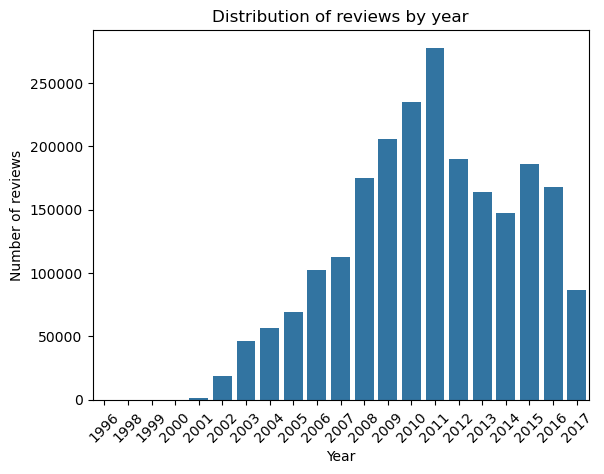

In [36]:
# Plot yearly review counts

sns.countplot(data=reviews, x='year', legend=False)
plt.title('Distribution of reviews by year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

We can see that before 2002, there are few reviews given by users on the BeerAdvocate website. We can choose a threshold of a minimum of 70'000 reviews by year to have enough reviews published by year to analyze the change over a year.

In [37]:
# Count the number of reviews by year
reviews_per_year = reviews['year'].value_counts()

# Filter to keep only years with more than 70'000 reviews
years_above_threshold = reviews_per_year[reviews_per_year > 70000].index
reviews = reviews[reviews['year'].isin(years_above_threshold)]

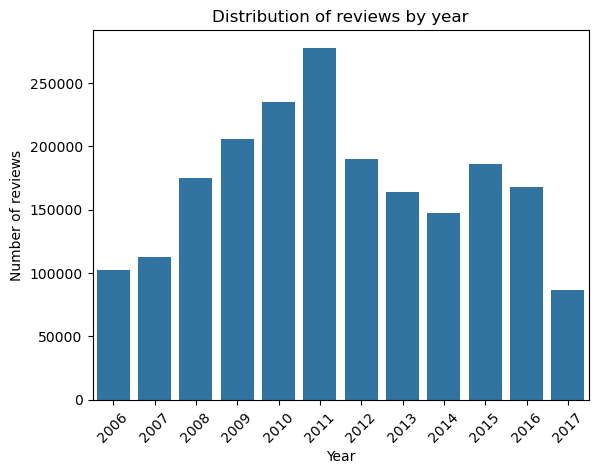

In [38]:
sns.countplot(data=reviews, x='year')
plt.title('Distribution of reviews by year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

We now have only reviews published between 2006 and 2017

#### Analysis across the seasons

/opt/anaconda3/envs/ada/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


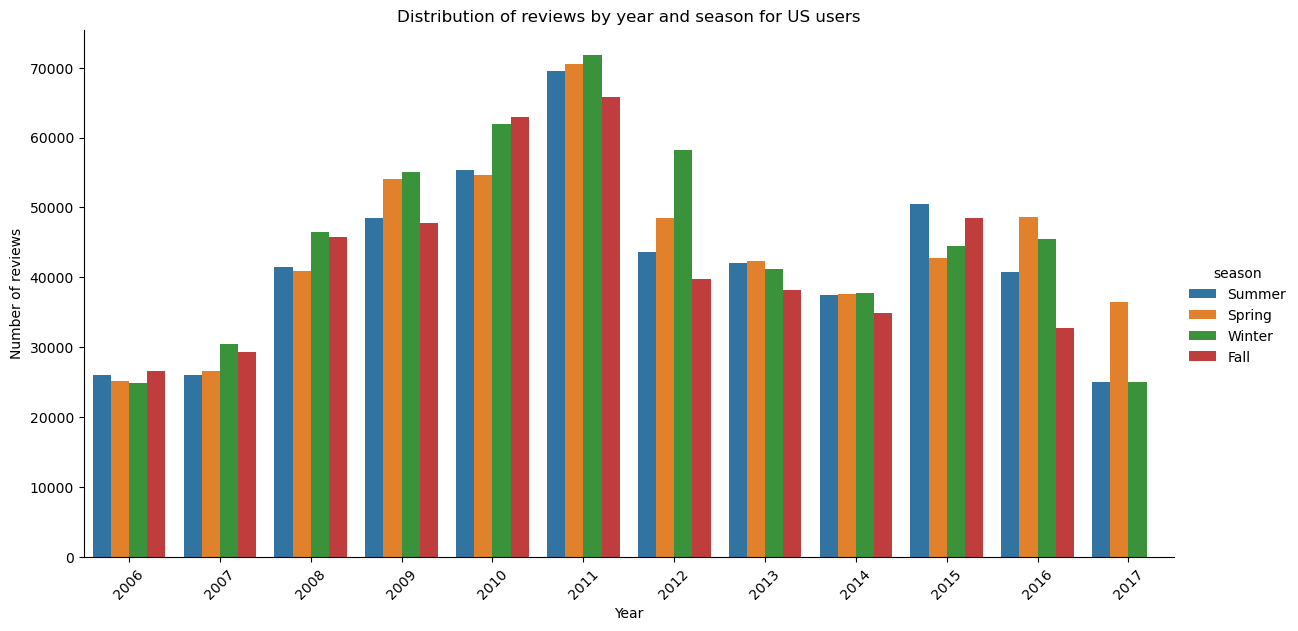

In [39]:
sns.catplot(data=reviews, x='year', hue='season', kind='count', height=6, aspect=2, legend=True)
plt.title('Distribution of reviews by year and season for US users')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.show()

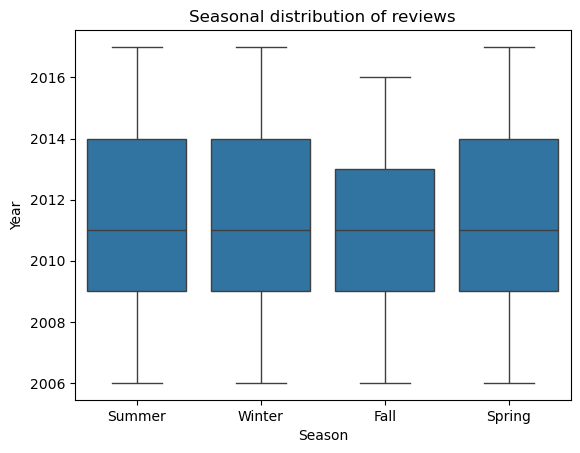

In [40]:
sns.boxplot(x='season', y='year', data=reviews)
plt.title('Seasonal distribution of reviews')
plt.xlabel('Season')
plt.ylabel('Year')
plt.show()

## Part from me that differs from results.ipynb 

* General scores per seasons

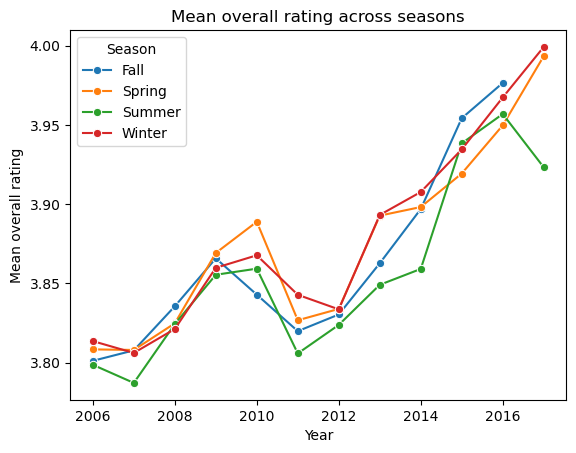

In [42]:
reviews.loc[:,'overall'] = pd.to_numeric(reviews['overall'], errors='coerce')
seasonal_overall = reviews.groupby(['season', 'year'])['overall'].mean().reset_index()

sns.lineplot(data=seasonal_overall, x='year', y='overall', hue='season', marker='o')
plt.title('Mean overall rating across seasons')
plt.xlabel('Year')
plt.ylabel('Mean overall rating')
plt.legend(title='Season')
plt.show()

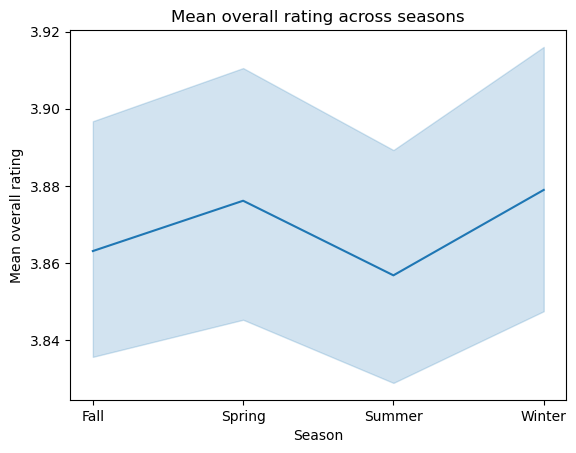

In [43]:
sns.lineplot(data=seasonal_overall, x='season', y='overall')
plt.title('Mean overall rating across seasons')
plt.xlabel('Season')
plt.ylabel('Mean overall rating')
plt.show()

In [ ]:
reviews.loc[:, 'abv'] = pd.to_numeric(reviews['abv'], errors='coerce')
reviews.loc[:,'appearance'] = pd.to_numeric(reviews['appearance'], errors='coerce')
reviews.loc[:,'aroma'] = pd.to_numeric(reviews['aroma'], errors='coerce')
reviews.loc[:,'palate'] = pd.to_numeric(reviews['palate'], errors='coerce')
reviews.loc[:,'rating'] = pd.to_numeric(reviews['rating'], errors='coerce')
reviews.loc[:,'taste'] = pd.to_numeric(reviews['taste'], errors='coerce')
reviews.loc[:,'overall'] = pd.to_numeric(reviews['overall'], errors='coerce')

In [91]:
reviews_grouped = reviews.groupby(['style', 'season', 'year']).agg({'abv': 'mean', 
                                                                          'appearance': 'mean',
                                                                            'aroma': 'mean',
                                                                            'overall': 'mean',
                                                                            'palate': 'mean',
                                                                            'rating': 'mean',
                                                                            'taste': 'mean'
}).reset_index()

nb_reviews = reviews.groupby(['style', 'season', 'year']).size().reset_index(name='nb_reviews')

reviews_grouped = pd.merge(reviews_grouped, nb_reviews, on=['style', 'season', 'year'], how='left')
reviews_grouped['overall'] = pd.to_numeric(reviews_grouped['overall'], errors='coerce')

In [117]:
reviews_grouped['nb_reviews'].describe()

count    4876.000000
mean      420.196883
std       703.336918
min         1.000000
25%        79.000000
50%       203.000000
75%       453.000000
max      7834.000000
Name: nb_reviews, dtype: float64

* Mean overall rating based on the number of reviews (Logarithmic categories because of the large standard deviation)

In [ ]:
# Create logarithmic bins
log_bins = np.logspace(np.log10(1), np.log10(7834), num=6)
log_labels = ["Low", "Medium-Low", "Medium-High", "High", "Very High"]

# Cutting the data into the defined categories
reviews_grouped['nb_review_log'] = pd.cut(reviews_grouped['nb_reviews'], bins=log_bins, labels=log_labels)

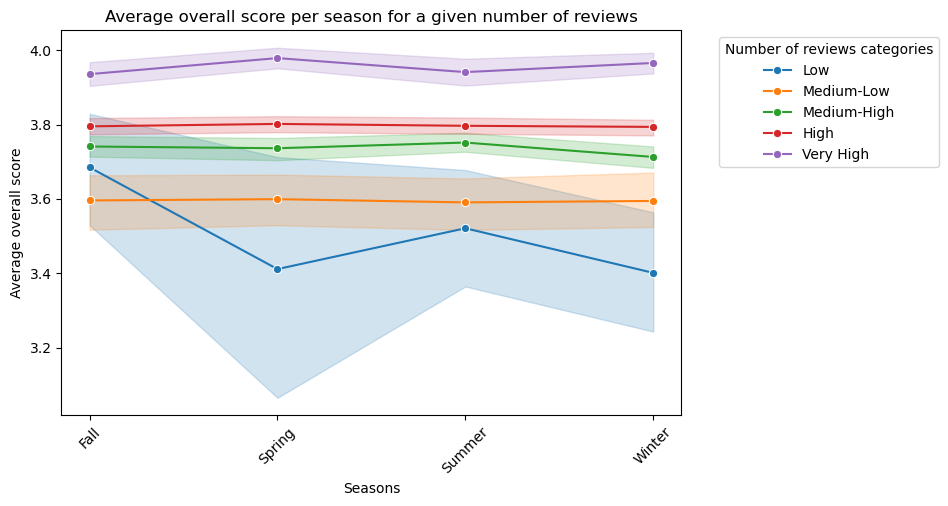

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=reviews_grouped, x='season', y='overall', hue='nb_review_log', marker='o')

plt.title('Average overall score per season for a given number of reviews')
plt.xlabel('Seasons')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Number of reviews categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

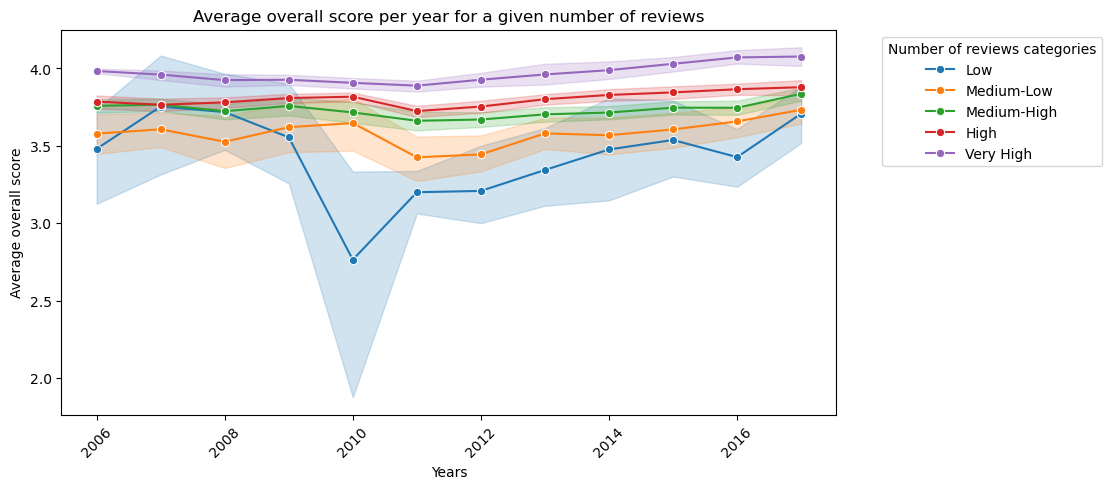

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=reviews_grouped, x='year', y='overall', hue='nb_review_log', marker='o')

plt.title('Average overall score per year for a given number of reviews')
plt.xlabel('Years')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Number of reviews categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

It seems that the more reviews a beer has, the higher it is rated. Besides, around the year 2011, the overall rating for the less reviewed beers seems to be lower. However, the confidence interval is very large so no conclusion can be made. Moreover, the less reviewed category seems to have more variability in the ratings, the confidence interval is the largest. 
We note that the average overall rating is driven by the most rated beers. 
Moreover, we don't really observe any seasonal variability in each of the categories, except for the low number of reviews one (still has a large confidence interval). 

Maybe we should do a ANOVA test (without the low nb of reviews category) to see if the means differ between each category but need to check equal variance to do so.

* Impact of the alchool concentration on the overall score

In [ ]:
reviews_grouped['abv'] = pd.to_numeric(reviews_grouped['abv'], errors='coerce')
reviews_grouped['abv'].describe()

count    4875.000000
mean        6.597449
std         2.020884
min         0.417857
25%         5.210161
50%         6.056474
75%         7.624017
max        17.340000
Name: abv, dtype: float64

In [197]:
quartile_labels = ["Low", "Medium-Low", "Medium-High", "High"]
reviews_grouped['abv_quartile'] = pd.qcut(reviews_grouped['abv'], q=4, labels=quartile_labels)

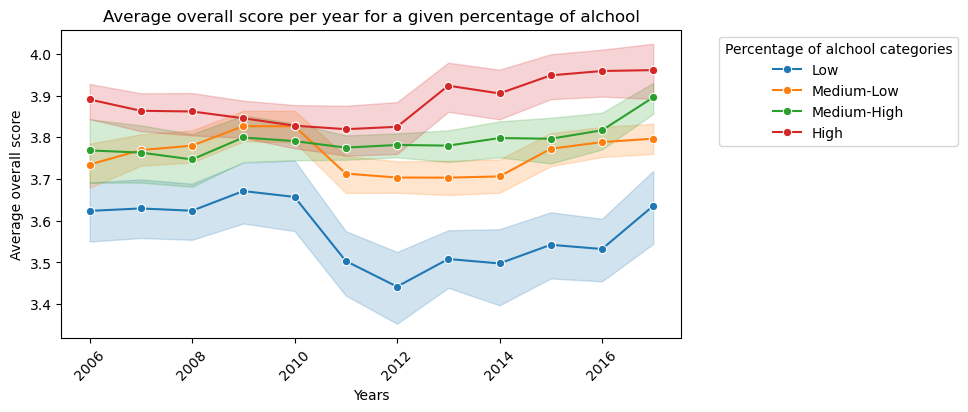

In [200]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=reviews_grouped, x='year', y='overall', hue='abv_quartile', marker='o')

plt.title('Average overall score per year for a given percentage of alchool')
plt.xlabel('Years')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Percentage of alchool categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

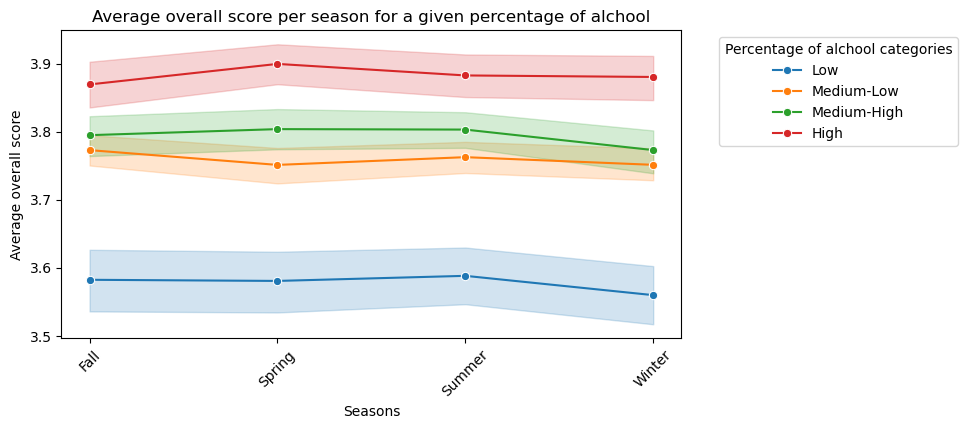

In [201]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=reviews_grouped, x='season', y='overall', hue='abv_quartile', marker='o')

plt.title('Average overall score per season for a given percentage of alchool')
plt.xlabel('Seasons')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Percentage of alchool categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

No variability across seasons

* Brewery

In [211]:
reviews_breweries = reviews.groupby(['brewery_name', 'season', 'year']).agg({'abv': 'mean', 
                                                                          'appearance': 'mean',
                                                                            'aroma': 'mean',
                                                                            'overall': 'mean',
                                                                            'palate': 'mean',
                                                                            'rating': 'mean',
                                                                            'taste': 'mean'
}).reset_index()
nb_reviews_breweries = reviews.groupby(['brewery_name', 'season', 'year']).size().reset_index(name='nb_reviews')

reviews_breweries = pd.merge(reviews_breweries, nb_reviews_breweries, on=['brewery_name', 'season', 'year'], how='left')
reviews_breweries['overall'] = pd.to_numeric(reviews_breweries['overall'], errors='coerce')

In [213]:
reviews_breweries['nb_reviews'].describe()

count    98041.000000
mean        20.898196
std         73.013425
min          1.000000
25%          1.000000
50%          4.000000
75%         11.000000
max       2205.000000
Name: nb_reviews, dtype: float64

Very skewed distribution, let's split the data using logarithmic bins

In [ ]:
log_bins_breweries = np.logspace(np.log10(min(reviews_breweries['nb_reviews'])), np.log10(max(reviews_breweries['nb_reviews'])), num=6)
log_labels = ["Low", "Medium-Low", "Medium-High", "High", "Very High"]

reviews_breweries['nb_reviews_log'] = pd.cut(reviews_breweries['nb_reviews'], bins=log_bins, labels=log_labels)

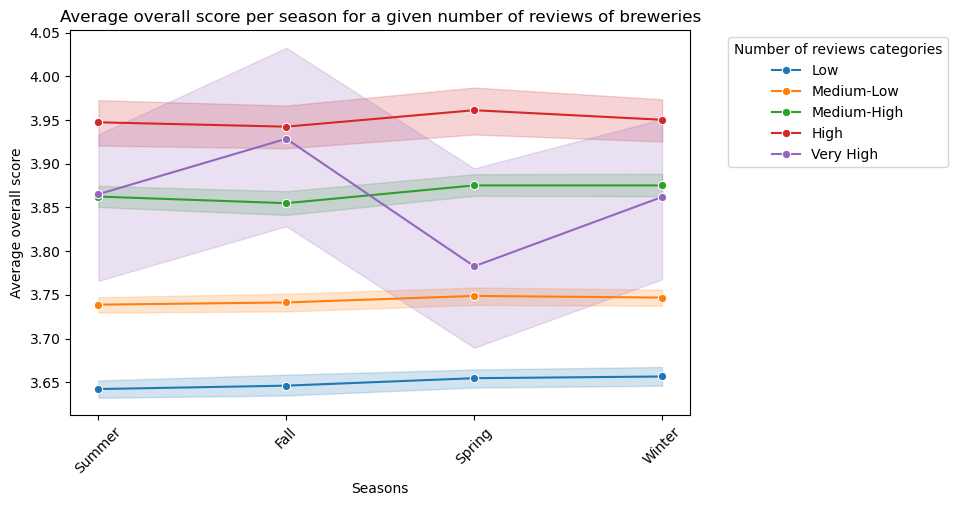

In [215]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=reviews_breweries, x='season', y='overall', hue='nb_reviews_log', marker='o')

plt.title('Average overall score per season for a given number of reviews of breweries')
plt.xlabel('Seasons')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Number of reviews categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

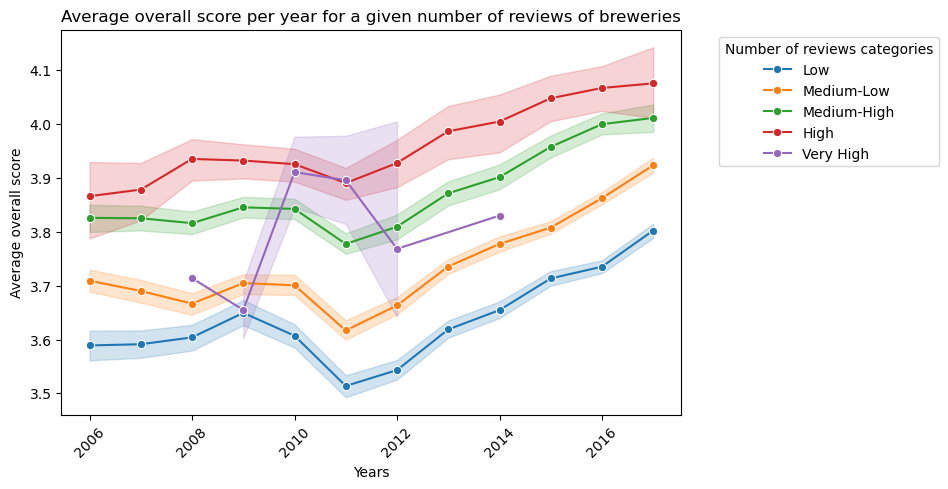

In [216]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=reviews_breweries, x='year', y='overall', hue='nb_reviews_log', marker='o')

plt.title('Average overall score per year for a given number of reviews of breweries')
plt.xlabel('Years')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Number of reviews categories', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

* Average rating per beer type for each season

In [173]:
# Select the top 2% beer style in terms of number of reviews 

reviews_per_style = reviews.groupby('style').size().reset_index(name='nb_reviews')
total_reviews = reviews_per_style['nb_reviews'].sum()
reviews_per_style['proportion'] = reviews_per_style['nb_reviews']/total_reviews
top_styles = reviews_per_style[reviews_per_style['proportion']> 0.02]
top_styles_list = top_styles['style'].tolist()
reviews_top_styles = reviews_grouped[reviews_grouped['style'].isin(top_styles_list)]

In [177]:
reviews_top_styles.loc[:, 'overall'] = reviews_top_styles['overall'].astype(float)

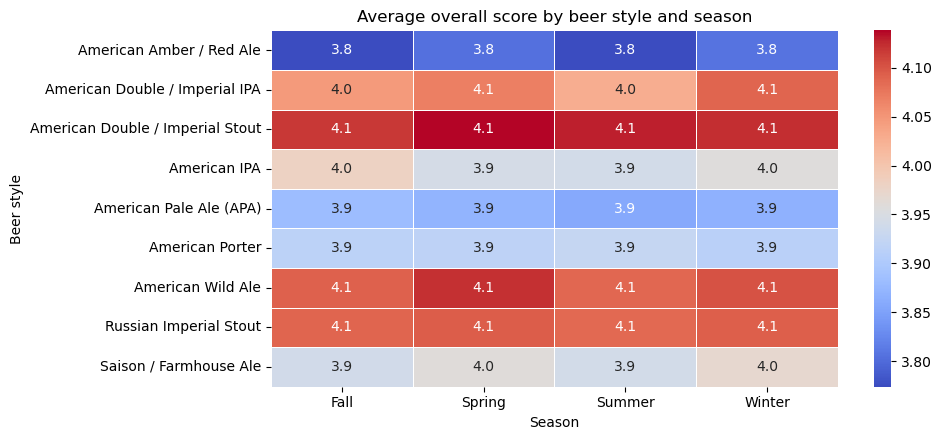

In [178]:
# Plot the average overall score by beer style and season
styles = reviews_top_styles['style'].unique()

heatmap_season_overall = reviews_top_styles.groupby(['style', 'season'])['overall'].mean().unstack(fill_value=0)

plt.figure(figsize=(10, len(styles) * 0.5)) 
sns.heatmap(heatmap_season_overall, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5)

plt.title('Average overall score by beer style and season')
plt.xlabel('Season')
plt.ylabel('Beer style')

plt.tight_layout()
plt.show()

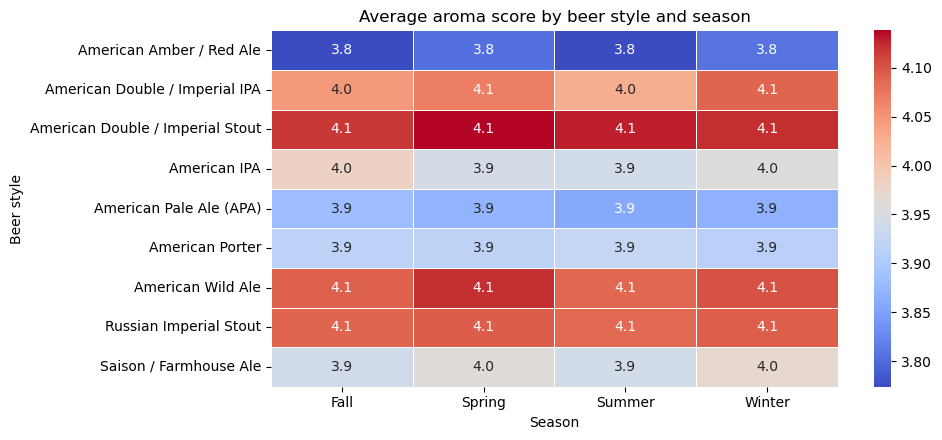

In [179]:
heatmap_season_aroma = reviews_top_styles.groupby(['style', 'season'])['aroma'].mean().unstack(fill_value=0)

plt.figure(figsize=(10, len(styles) * 0.5)) 
sns.heatmap(heatmap_season_overall, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5)

plt.title('Average aroma score by beer style and season')
plt.xlabel('Season')
plt.ylabel('Beer style')

plt.tight_layout()

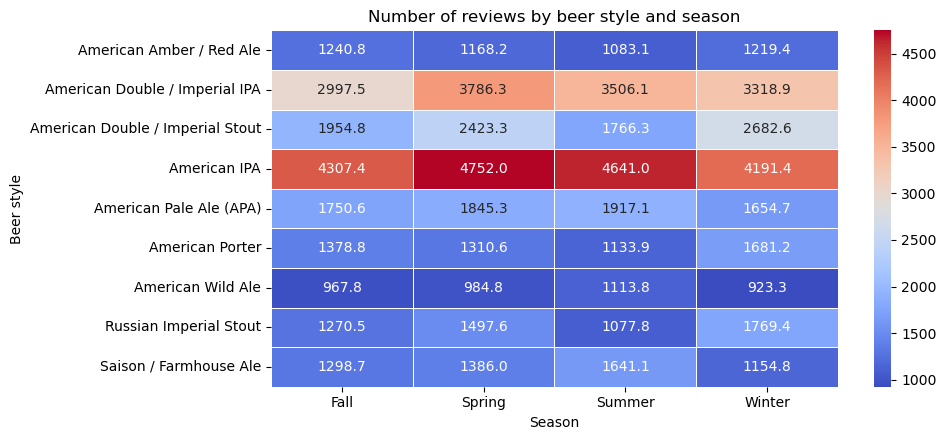

In [180]:
# Plot the number of reviews per style per season

heatmap_season_nbreviews = reviews_top_styles.groupby(['style', 'season'])['nb_reviews'].mean().unstack(fill_value=0)

plt.figure(figsize=(10, len(styles) * 0.5)) 
sns.heatmap(heatmap_season_nbreviews, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5)

plt.title('Number of reviews by beer style and season')
plt.xlabel('Season')
plt.ylabel('Beer style')

plt.tight_layout()
plt.show()

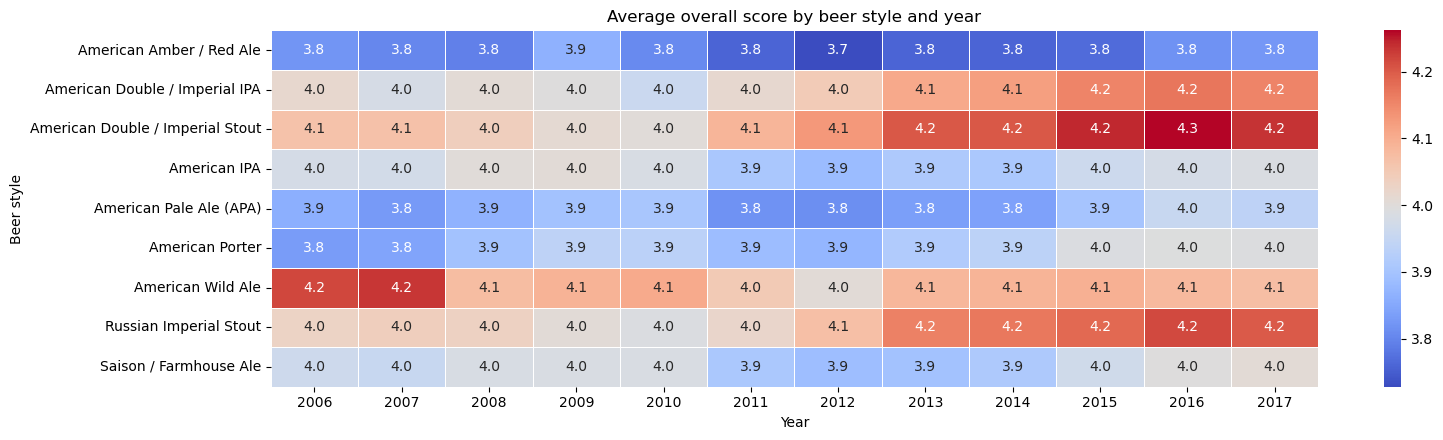

In [181]:
# Plot the average overall score by beer style and year

heatmap_year_overall = reviews_top_styles.groupby(['style', 'year'])['overall'].mean().unstack(fill_value=0)

plt.figure(figsize=(16, len(styles) * 0.5)) 
sns.heatmap(heatmap_year_overall, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5)

plt.title('Average overall score by beer style and year')
plt.xlabel('Year')
plt.ylabel('Beer style')

plt.tight_layout()
plt.show()

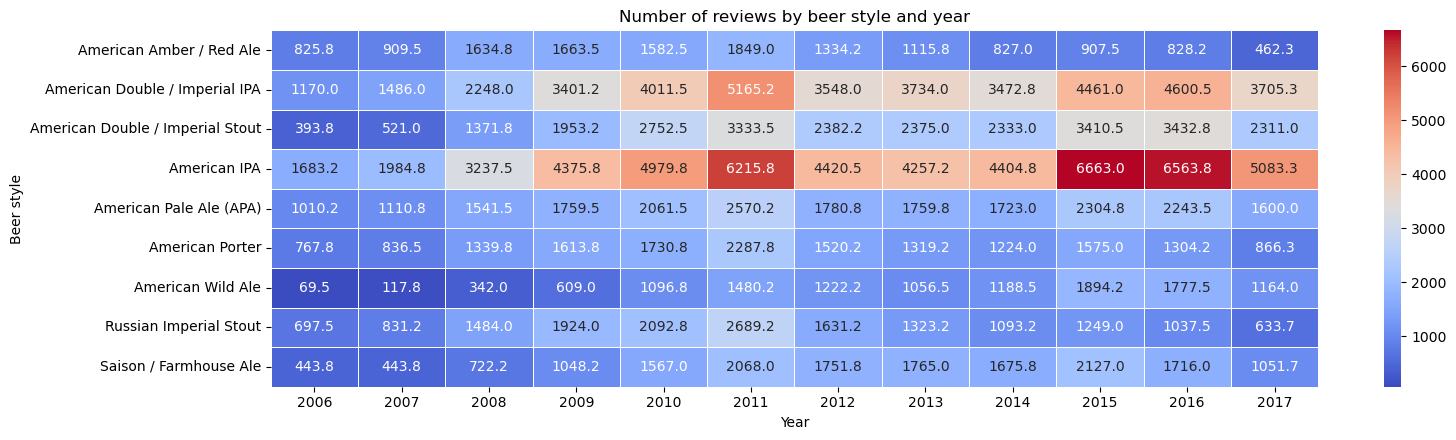

In [182]:
# Plot the number of reviews per style per year

heatmap_year_nbreviews = reviews_top_styles.groupby(['style', 'year'])['nb_reviews'].mean().unstack(fill_value=0)

plt.figure(figsize=(16, len(styles) * 0.5)) 
sns.heatmap(heatmap_year_nbreviews, cmap='coolwarm', annot=True, fmt='.1f', cbar=True, linewidths=0.5)

plt.title('Number of reviews by beer style and year')
plt.xlabel('Year')
plt.ylabel('Beer style')

plt.tight_layout()
plt.show()

Based on the number of reviews per style per year, we may need to truncate these elements to obtain more meaningful results.

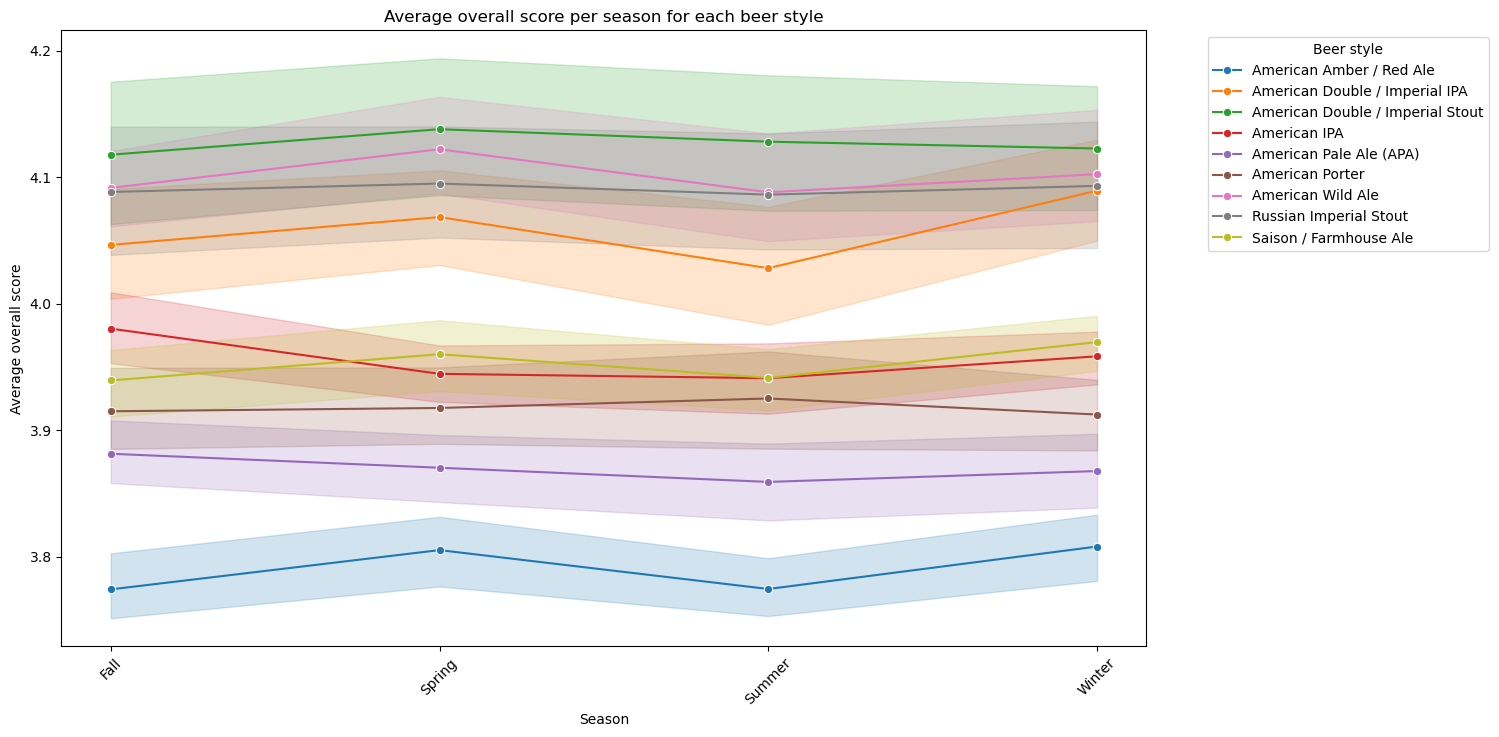

In [184]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=reviews_top_styles, x='season', y='overall', hue='style', marker='o')

plt.title('Average overall score per season for each beer style')
plt.xlabel('Season')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Beer style', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

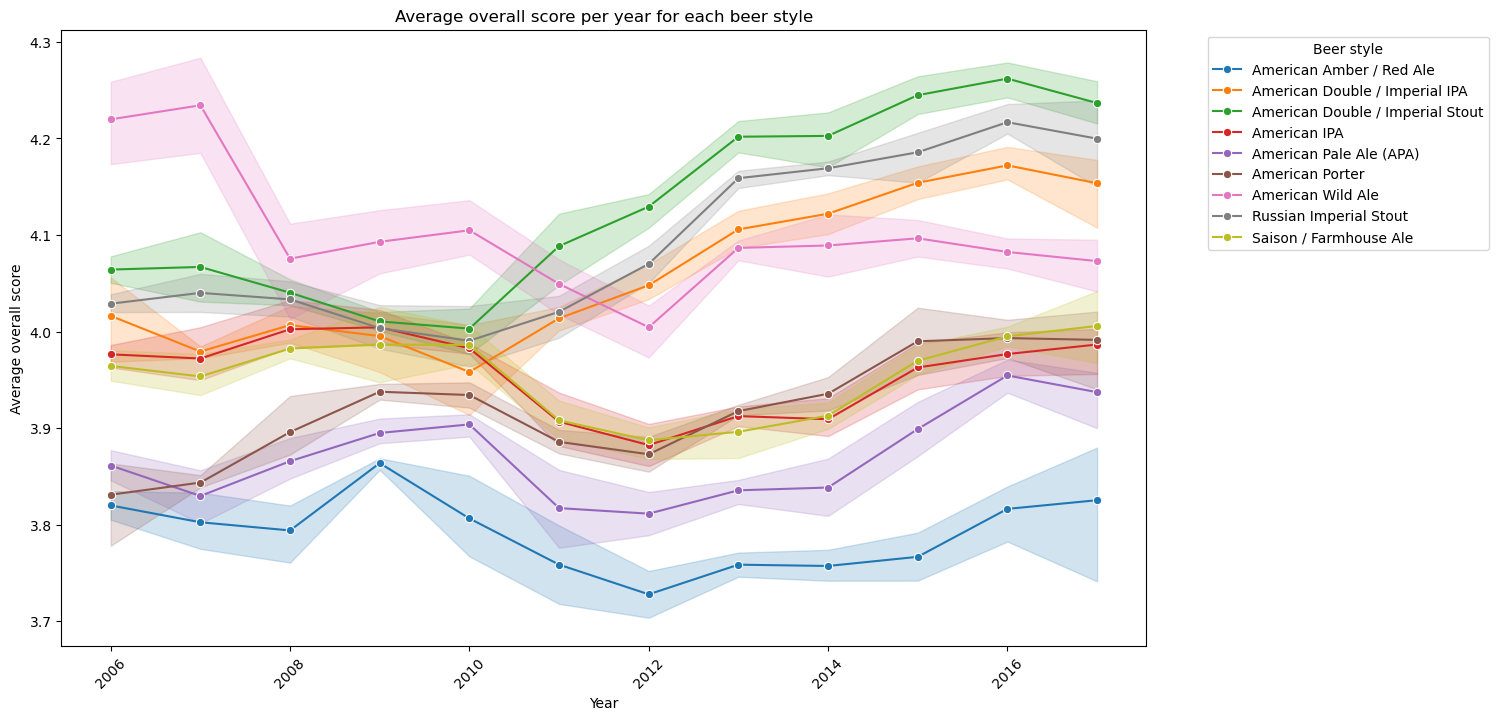

In [186]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=reviews_top_styles, x='year', y='overall', hue='style', marker='o')

plt.title('Average overall score per year for each beer style')
plt.xlabel('Year')
plt.ylabel('Average overall score')
plt.xticks(rotation=45)  
plt.legend(title='Beer style', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()